## <div align="center" style="font-style:italic"> Deteksi Anomali Pupuk Tanah menggunakan Density-Based Spatial Clustering of Applications with Noise </div>
 <h2>Anggota :</h2>
 <ol>
    <li>Farrel Dinarta / 00000055702</li>
    <li>Prudence Tendy / 00000060765</li>
    <li>Christsen Alston Angello / 00000053444</li>
 </ol>

## Sumber Dataset :
1. https://www.kaggle.com/datasets/gdabhishek/fertilizer-prediction
2. https://www.kaggle.com/datasets/srprojects/fertilizer-prediction
3. https://www.kaggle.com/datasets/sanamps/crop-prediction

### Import Libraries

In [1287]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import normalize
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score, accuracy_score
from sklearn.decomposition import PCA


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression

%matplotlib inline

### Import Datasets

In [1288]:
# https://www.kaggle.com/datasets/gdabhishek/fertilizer-prediction
dataset_1 = pd.read_csv("Fertilizer Prediction.csv")
print(dataset_1.info())
print(dataset_1.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Temparature      99 non-null     int64 
 1   Humidity         99 non-null     int64 
 2   Moisture         99 non-null     int64 
 3   Soil Type        99 non-null     object
 4   Crop Type        99 non-null     object
 5   Nitrogen         99 non-null     int64 
 6   Potassium        99 non-null     int64 
 7   Phosphorous      99 non-null     int64 
 8   Fertilizer Name  99 non-null     object
dtypes: int64(6), object(3)
memory usage: 7.1+ KB
None
   Temparature  Humidity  Moisture Soil Type  Crop Type  Nitrogen  Potassium  \
0           26        52        38     Sandy      Maize        37          0   
1           29        52        45     Loamy  Sugarcane        12          0   
2           34        65        62     Black     Cotton         7          9   
3           32        62    

In [1289]:
# https://www.kaggle.com/datasets/srprojects/fertilizer-prediction
dataset_2 = pd.read_csv("Fertilizer Prediction 2.csv")
print(dataset_2.info())
print(dataset_2.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  200 non-null    float64
 1   Humidity     200 non-null    float64
 2   Rainfall     200 non-null    float64
 3   pH           200 non-null    float64
 4   N            200 non-null    float64
 5   P            200 non-null    float64
 6   K            200 non-null    float64
 7   Soil         200 non-null    object 
 8   Crop         200 non-null    object 
 9   Fertilizer   200 non-null    object 
dtypes: float64(7), object(3)
memory usage: 15.8+ KB
None
   Temperature  Humidity  Rainfall    pH    N    P    K        Soil     Crop  \
0        24.87     82.84    295.61  6.59  4.0  2.0  2.5      Clayey     rice   
1        28.69     96.65    178.96  6.08  4.0  4.0  4.0    laterite  Coconut   
2        20.27     81.64    270.44  5.01  4.0  4.0  2.0  silty clay     rice   
3        25.0

In [1290]:
# https://www.kaggle.com/datasets/sanamps/crop-prediction
dataset_3 = pd.read_csv("Fertilizer Prediction 3.csv")
print(dataset_3.info())
print(dataset_3.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB
None
    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice


=========================================================================================================
### DATA PREPROCESSING OVERVIEW
 <h3>Feature Selection</h3>
 <ol>
    <li>Nitrogen (ppm)</li>
    <li>Potassium (ppm)</li>
    <li>Phosphorous (ppm)</li>
    <li>Humidity (%)</li>
    <li>Temperature (Celsius)</li>
    <li>Moisture (%)</li>    
    <li>Rainfall (mm)</li>
    <li>pH (0-14)</li>
    <li>Name</li>
 </ol>
 
<h3>Data Cleaning</h3>
<ol>
    <li>Features with incomplete values : </li>
    <table border="1" style="width:70%">
        <tr>
            <th></th>
            <th>Rainfall</th>
            <th>Moisture</th>
            <th>pH</th>
            <th>Name</th>
        </tr>
        <tr>
            <td><b>Dataset 1</b></td>
            <td>Doesn't Exist</td>
            <td>Exists</td>
            <td>Doesn't Exist</td>            
            <td>Exists</td>            
        </tr>
        <tr>
            <td><b>Dataset 2</b></td>
            <td>Exists</td>
            <td>Doesn't Exists</td>
            <td>Exists</td>
            <td>Exists</td>            
        </tr>
        <tr>
            <td><b>Dataset 3</b></td>
            <td>Exists</td>
            <td>Doesn't Exists</td>
            <td>Exists</td>        
            <td>Doesn't Exists</td>            
        </tr>
    </table>
    <li>Since we are merging three datasets and incompleteness on the crucial features seems to be unavoidable, we will predict them using supervised model (Linear Regression)
</ol>
 
<h3>Data Integration</h3>
<ol>
    <li>Integrate the given selected features.</li>
    <li>Remove unneccessary or uncommon features.</li>
    <li>Removed features :</li>
    <ol>
        <li>Crop Type</li>
        <li>Soil Type</li>
    </ol>
</ol>

<h3>Feature Scaling</h3>
 <ol>
    <li>The datasets will be normalized since various units and scale are used.</li>
 </ol>
 
 <h3>Merge Datasets</h3>
 <ol>
    <li>Each preprocessed dataset with synchronized features are merged into one dataset for the DBSCAN modeling.</li>
 </ol>
 
  <h3>Data Segmentation</h3>
 <ol>
    <li>The dataset will be split again according to fertilizer type.</li>
 </ol>

=========================================================================================================

### PREPROCESSING : FEATURE SELECTION

In [1291]:
# Synchronize column names
used_features = ['temperature', 'humidity', 'nitrogen', 'potassium', 'phosphorous', 'ph', 'rainfall', 'moisture', 'name']

### Dataset 1

In [1292]:
# rename existing columns
dataset_1 = dataset_1.rename(
    columns = {
        'Temparature' : used_features[0], 
        'Humidity' : used_features[1], 
        'Nitrogen' : used_features[2], 
        'Potassium' : used_features[3],
        'Phosphorous' : used_features[4], 
        'Moisture' : used_features[7], 
        'Fertilizer Name' : used_features[8]
    }
)

dataset_1 = dataset_1[used_features[:5] + [used_features[-1], used_features[-2]]]
X_d1 = dataset_1 # for supervised prediction model

# add inexistent columns
new_feature_dataset_1 = pd.DataFrame(columns=used_features[5:7])
dataset_1 = pd.concat([dataset_1, new_feature_dataset_1], axis=1)
dataset_1.head()

,temperature,humidity,nitrogen,potassium,phosphorous,name,moisture,ph,rainfall
0,26,52,37,0,0,Urea,38,NaN,NaN
1,29,52,12,0,36,DAP,45,NaN,NaN
2,34,65,7,9,30,14-35-14,62,NaN,NaN
3,32,62,22,0,20,28-28,34,NaN,NaN
4,28,54,35,0,0,Urea,46,NaN,NaN


### Dataset 2

In [1293]:
# rename existing columns
dataset_2 = dataset_2.rename(
    columns = {
        'Temperature' : used_features[0], 
        'Humidity' : used_features[1], 
        'N' : used_features[2], 
        'K' : used_features[3],
        'P' : used_features[4],
        'Rainfall' : used_features[6], 
        'pH' : used_features[5], 
        'Fertilizer' : used_features[8]
    }
)

dataset_2 = dataset_2[used_features[:7] + [used_features[-1]]]
X_d2 = dataset_2 # for supervised prediction model

# add inexistent columns
new_feature_dataset_2 = pd.DataFrame(columns=[used_features[7]])
dataset_2 = pd.concat([dataset_2, new_feature_dataset_2], axis=1)
dataset_2.head()

,temperature,humidity,nitrogen,potassium,phosphorous,ph,rainfall,name,moisture
0,24.87,82.84,4.0,2.5,2.0,6.59,295.61,DAP and MOP,NaN
1,28.69,96.65,4.0,4.0,4.0,6.08,178.96,Good NPK,NaN
2,20.27,81.64,4.0,2.0,4.0,5.01,270.44,MOP,NaN
3,25.07,95.02,2.0,3.5,2.1,5.55,192.90,Urea and DAP,NaN
4,25.04,95.90,2.0,2.1,3.9,6.18,174.80,Urea and MOP,NaN


### Dataset 3

In [1294]:
# rename existing columns
dataset_3 = dataset_3.rename(
    columns = {
        'temperature' : used_features[0], 
        'humidity' : used_features[1], 
        'N' : used_features[2], 
        'K' : used_features[3],
        'P' : used_features[4],
        'rainfall' : used_features[6], 
        'ph' : used_features[5]        
    }
)

dataset_3 = dataset_3[used_features[:7]]
X_d3 = dataset_3 # for supervised prediction model

# add inexistent columns
new_feature_dataset_3 = pd.DataFrame(columns=used_features[-2:])
dataset_3 = pd.concat([dataset_3, new_feature_dataset_3], axis=1)
dataset_3.head()

,temperature,humidity,nitrogen,potassium,phosphorous,ph,rainfall,moisture,name
0,20.879744,82.002744,90,43,42,6.502985,202.935536,NaN,NaN
1,21.770462,80.319644,85,41,58,7.038096,226.655537,NaN,NaN
2,23.004459,82.320763,60,44,55,7.840207,263.964248,NaN,NaN
3,26.491096,80.158363,74,40,35,6.980401,242.864034,NaN,NaN
4,20.130175,81.604873,78,42,42,7.628473,262.717340,NaN,NaN


### PREPROCESSING : FEATURE SCALING (FOR PREDICTION)
- This scaling is intended for the feature predictions from the datasets.
- Normalise all except "name".

In [1295]:
scaler = MinMaxScaler()

name_column1 = dataset_1['name']
name_column2 = dataset_2['name']
name_column3 = dataset_3['name']


td_1 = dataset_1
td_2 = dataset_2
td_3 = dataset_3

original_columns1 = td_1.columns.tolist()
normalized_columns1 = list(filter(lambda x : x not in ["ph", "rainfall"], original_columns))
td_scaled1 = scaler.fit_transform(td_1[normalized_columns])
td_1 = pd.DataFrame(td_scaled1, columns=normalized_columns)
td_1["name"] = name_column1

original_columns2 = td_2.columns.tolist()
normalized_columns2 = list(filter(lambda x : x not in ["moisture"], original_columns))
td_scaled2 = scaler.fit_transform(td_2[normalized_columns])
td_2 = pd.DataFrame(td_scaled2, columns=normalized_columns)
td_2["name"] = name_column2

original_columns3 = td_3.columns.tolist()
normalized_columns3 = list(filter(lambda x : x not in ["moisture", "name"], original_columns))
td_scaled3 = scaler.fit_transform(td_3[normalized_columns])
td_3 = pd.DataFrame(td_scaled3, columns=normalized_columns)
td_3["name"] = name_column3

X_d1 = td_1[used_features[:5] + [used_features[-1], used_features[-2]]]
X_d2 = td_2[used_features[:7] + [used_features[-1]]]
X_d3 = td_3[used_features[:7]]

print("Dataset 1\n", td_1.head(), '\n')
print("Dataset 2\n", td_2.head(), '\n')
print("Dataset 3\n", td_3.head(), '\n')


Dataset 1
    temperature  humidity  nitrogen  potassium  phosphorous  moisture  ph  \
0     0.076923  0.090909  0.868421   0.000000     0.000000     0.325 NaN   
1     0.307692  0.090909  0.210526   0.000000     0.857143     0.500 NaN   
2     0.692308  0.681818  0.078947   0.473684     0.714286     0.925 NaN   
3     0.538462  0.545455  0.473684   0.000000     0.476190     0.225 NaN   
4     0.230769  0.181818  0.815789   0.000000     0.000000     0.525 NaN   

   rainfall      name  
0       NaN      Urea  
1       NaN       DAP  
2       NaN  14-35-14  
3       NaN     28-28  
4       NaN      Urea   

Dataset 2
    temperature  humidity  nitrogen  potassium  phosphorous  moisture  \
0     0.490835  0.136959  0.909091   0.285714         0.00       NaN   
1     0.879837  0.832326  0.909091   1.000000         1.00       NaN   
2     0.022403  0.076536  0.909091   0.047619         1.00       NaN   
3     0.511202  0.750252  0.000000   0.761905         0.05       NaN   
4     0.508147 

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_data.py:479: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_data.py:480: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_data.py:479: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_data.py:480: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_data.py:479: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_data.py:480: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


### PREPROCESSING : HANDLE FERTILIZER NAME (CATEGORICAL)

- Get all unique fertilizer name

In [1296]:
fertilizer_name_d1 = np.unique(np.array(dataset_1['name']))
fertilizer_name_d2 = np.unique(np.array(dataset_2['name']))
unique_names = np.unique(np.concatenate((fertilizer_name_d1, fertilizer_name_d2)))
unique_names

array(['10-26-26', '14-35-14', '17-17-17', '20-20', '28-28', 'DAP',
       'DAP and MOP', 'Good NPK', 'MOP', 'Urea', 'Urea and DAP',
       'Urea and MOP'], dtype=object)

- Map fertilizer name into integer

In [1297]:
name_int_mapping = {name: idx for idx, name in enumerate(unique_names)}

dataset_1['name'] = dataset_1['name'].map(name_int_mapping)
X_d1['name'] = X_d1['name'].map(name_int_mapping)

dataset_2['name'] = dataset_2['name'].map(name_int_mapping)
X_d2['name'] = X_d2['name'].map(name_int_mapping)

name_int_mapping

C:\Users\farre\AppData\Local\Temp\ipykernel_15608\310265365.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_d1['name'] = X_d1['name'].map(name_int_mapping)
C:\Users\farre\AppData\Local\Temp\ipykernel_15608\310265365.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_d2['name'] = X_d2['name'].map(name_int_mapping)


{'10-26-26': 0,
 '14-35-14': 1,
 '17-17-17': 2,
 '20-20': 3,
 '28-28': 4,
 'DAP': 5,
 'DAP and MOP': 6,
 'Good NPK': 7,
 'MOP': 8,
 'Urea': 9,
 'Urea and DAP': 10,
 'Urea and MOP': 11}

- Inverse Mapping

In [1298]:
inv_name_mapping = {v : k for k, v in name_int_mapping.items()}
print(dataset_1['name'].map(inv_name_mapping))
print(dataset_2['name'].map(inv_name_mapping))

0         Urea
1          DAP
2     14-35-14
3        28-28
4         Urea
        ...   
94       28-28
95    10-26-26
96        Urea
97         DAP
98       20-20
Name: name, Length: 99, dtype: object
0       DAP and MOP
1          Good NPK
2               MOP
3      Urea and DAP
4      Urea and MOP
           ...     
195             DAP
196    Urea and MOP
197    Urea and DAP
198             DAP
199    Urea and MOP
Name: name, Length: 200, dtype: object


### PREPROCESSING : IMPUTING MISSING VALUES

- Using Linear Regression model

### Dataset 1

<ol>
    <li>Predict `rainfall` and `ph` using the third dataset.</li>
<ol>

In [1299]:
y_d3 = X_d3[['rainfall', 'ph']]
X_d3 = X_d3.drop(columns=["rainfall", 'ph'], axis=1)

model = LinearRegression()
model.fit(X_d3, y_d3)

LinearRegression()

In [1300]:
X_train1 = X_d1.drop(columns=['name', 'moisture']) # drop since still null
y_pred = model.predict(X_train1)
y_pred = np.array(y_pred)

y_pred[:20]

array([[0.30333998, 0.50610457],
       [0.28495467, 0.47617386],
       [0.26134581, 0.42226364],
       [0.30429488, 0.47892635],
       [0.29629259, 0.4987597 ],
       [0.25369279, 0.44197543],
       [0.29131582, 0.48523151],
       [0.30651081, 0.49197742],
       [0.30871731, 0.4836995 ],
       [0.2770258 , 0.44586719],
       [0.31078775, 0.4846631 ],
       [0.2401608 , 0.41006336],
       [0.30140689, 0.50762891],
       [0.30636708, 0.48065863],
       [0.31044351, 0.48789301],
       [0.24733878, 0.41545722],
       [0.30485253, 0.48945914],
       [0.30229899, 0.49554506],
       [0.29850363, 0.50211741],
       [0.31161505, 0.4798287 ]])

In [1301]:
y_pred2 = model.predict(X_d3)
mse = mean_squared_error(y_d3, y_pred2)
mse

0.026075785214175494

- Insert the prediction result into the original dataset

In [1302]:
dataset_1["rainfall"] = y_pred[:, 0]
dataset_1["ph"] = y_pred[:, 1]
print(dataset_1.head())

   temperature  humidity  nitrogen  potassium  phosphorous  name  moisture  \
0           26        52        37          0            0     9        38   
1           29        52        12          0           36     5        45   
2           34        65         7          9           30     1        62   
3           32        62        22          0           20     4        34   
4           28        54        35          0            0     9        46   

         ph  rainfall  
0  0.506105  0.303340  
1  0.476174  0.284955  
2  0.422264  0.261346  
3  0.478926  0.304295  
4  0.498760  0.296293  


### Dataset 2

<ol>
    <li>Predict `moisture` using the first dataset.</li>
<ol>

In [1303]:
y_d1 = X_d1[['moisture']]
X_d1 = X_d1.drop(columns=["moisture"], axis=1)

model = LinearRegression()
model.fit(X_d1, y_d1)

LinearRegression()

In [1304]:
X_train2 = dataset_2.drop(columns=['moisture','rainfall', 'ph'])
y_pred = model.predict(X_train2)
y_pred = np.array(y_pred)

y_pred[:20]

array([[ 0.12914712],
       [-0.08145934],
       [-0.81519392],
       [ 0.57275046],
       [ 0.29048712],
       [-0.27115963],
       [ 0.29262004],
       [ 0.27034878],
       [ 0.29451056],
       [-0.10176683],
       [ 0.39174966],
       [-0.15158395],
       [-0.18686919],
       [ 0.00440057],
       [ 0.20364818],
       [ 0.67510837],
       [ 0.07833316],
       [ 0.75541261],
       [ 1.15143849],
       [ 0.87191206]])

In [1305]:
y_pred2 = model.predict(X_d1)
mse = mean_squared_error(y_d1, y_pred2)
mse

0.07583349221222904

- Insert the prediction result into the original dataset

In [1306]:
dataset_2["moisture"] = y_pred[:, 0]
print(dataset_2.head())

   temperature  humidity  nitrogen  potassium  phosphorous    ph  rainfall  \
0        24.87     82.84       4.0        2.5          2.0  6.59    295.61   
1        28.69     96.65       4.0        4.0          4.0  6.08    178.96   
2        20.27     81.64       4.0        2.0          4.0  5.01    270.44   
3        25.07     95.02       2.0        3.5          2.1  5.55    192.90   
4        25.04     95.90       2.0        2.1          3.9  6.18    174.80   

   name  moisture  
0     6  0.129147  
1     7 -0.081459  
2     8 -0.815194  
3    10  0.572750  
4    11  0.290487  


### Dataset 3

<ol>
    <li>Predict `name` using the first and second dataset.</li>
<ol>

In [1307]:
# merge dataset 1 and 2
dataset_1 = dataset_1.astype(float)
dataset_2 = dataset_2.astype(float)
dataset_3 = dataset_3.astype(float)
merged_dataset = pd.merge(dataset_1, dataset_2, how='outer')

y = merged_dataset[['name']]
X = merged_dataset.drop(columns=["name", 'moisture'], axis=1)

model = LogisticRegression(max_iter=10000, multi_class='ovr', random_state=42)
model.fit(X, y)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=10000, multi_class='ovr', random_state=42)

In [1308]:
X_train3 = dataset_3.drop(columns=['name','moisture'])
y_pred = model.predict(X_train3)
y_pred = np.array(y_pred)
np.unique(y_pred[:])

array([0., 1., 5., 7.])

In [1309]:
y_pred2 = model.predict(X)
accuracy = accuracy_score(y, y_pred2)
accuracy

0.822742474916388

- Insert the prediction result into the original dataset

In [1310]:
# dataset_3["moisture"] = y_pred[:, 0]
dataset_3["name"] = y_pred[:].round().astype(int)
print(dataset_3.head())

   temperature   humidity  nitrogen  potassium  phosphorous        ph  \
0    20.879744  82.002744      90.0       43.0         42.0  6.502985   
1    21.770462  80.319644      85.0       41.0         58.0  7.038096   
2    23.004459  82.320763      60.0       44.0         55.0  7.840207   
3    26.491096  80.158363      74.0       40.0         35.0  6.980401   
4    20.130175  81.604873      78.0       42.0         42.0  7.628473   

     rainfall  moisture  name  
0  202.935536       NaN     7  
1  226.655537       NaN     7  
2  263.964248       NaN     7  
3  242.864034       NaN     7  
4  262.717340       NaN     7  


- Predict `moisture` using the first and second dataset

In [1311]:
name_col = merged_dataset["name"]
norm_columns = list(filter(lambda x : x != "name", original_columns))
t_merged_dataset = scaler.fit_transform(merged_dataset[norm_columns])
t_merged_dataset = pd.DataFrame(t_merged_dataset, columns=norm_columns)
t_merged_dataset["name"] = name_col

y = t_merged_dataset[['moisture']]
X = t_merged_dataset.drop(columns=["name", 'moisture'], axis=1)

model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [1312]:
X_train3 = td_3.drop(columns=['name', 'moisture'])

y_pred = model.predict(X_train3)
y_pred = np.array(y_pred)
y_pred[:20]

array([[0.11836429],
       [0.09174776],
       [0.03352879],
       [0.1209922 ],
       [0.02570499],
       [0.07576404],
       [0.14290324],
       [0.13358232],
       [0.11229019],
       [0.13475675],
       [0.18939108],
       [0.06254189],
       [0.20200031],
       [0.12078244],
       [0.12745471],
       [0.11159938],
       [0.09780387],
       [0.11692832],
       [0.15555111],
       [0.12127051]])

In [1313]:
y_pred2 = model.predict(X)
mse = mean_squared_error(y, y_pred2)
mse

0.010700442079944354

- Insert the prediction result into the original dataset

In [1314]:
dataset_3["moisture"] = y_pred[:]
dataset_3.head()

,temperature,humidity,nitrogen,potassium,phosphorous,ph,rainfall,moisture,name
0,20.879744,82.002744,90.0,43.0,42.0,6.502985,202.935536,0.118364,7
1,21.770462,80.319644,85.0,41.0,58.0,7.038096,226.655537,0.091748,7
2,23.004459,82.320763,60.0,44.0,55.0,7.840207,263.964248,0.033529,7
3,26.491096,80.158363,74.0,40.0,35.0,6.980401,242.864034,0.120992,7
4,20.130175,81.604873,78.0,42.0,42.0,7.628473,262.717340,0.025705,7


### PREPROCESSING : MERGE ALL DATASET
- Merge and filter irrelevant values

In [1315]:
# merge
merged_dataset["name"] = merged_dataset["name"].round().astype(int)
merged_dataset = pd.merge(merged_dataset, dataset_3, how='outer')

# filter 
merged_dataset = merged_dataset[(merged_dataset["name"] >= 0) | (merged_dataset["moisture"] >= 0)]
print(merged_dataset.shape)

(2499, 9)


### PREPROCESSING : FEATURE SCALING ON MERGED DATASET
- Normalise all except "name"

In [1316]:
scaler = MinMaxScaler()

unormalized_dataset = merged_dataset
name_column = merged_dataset['name']


original_columns = merged_dataset.columns.tolist()
normalized_columns = list(filter(lambda x : x != "name", original_columns))

merged_dataset_scaled = scaler.fit_transform(merged_dataset[normalized_columns])
merged_dataset = pd.DataFrame(merged_dataset_scaled, columns=normalized_columns)

merged_dataset["name"] = name_column

merged_dataset = merged_dataset.dropna(subset=['name'])
      
merged_dataset["name"] = merged_dataset["name"].round().astype(int)

print(merged_dataset.info())
# print(merged_dataset.isna().sum())
# print(np.isinf(merged_dataset).sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2499 entries, 0 to 2498
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temperature  2499 non-null   float64
 1   humidity     2499 non-null   float64
 2   nitrogen     2499 non-null   float64
 3   potassium    2499 non-null   float64
 4   phosphorous  2499 non-null   float64
 5   moisture     2499 non-null   float64
 6   ph           2499 non-null   float64
 7   rainfall     2499 non-null   float64
 8   name         2499 non-null   int32  
dtypes: float64(8), int32(1)
memory usage: 166.1 KB
None


### PREPROCESSING : DATA SEGMENTATION

In [1317]:
for key, value in name_int_mapping.items():
    count = len(merged_dataset[merged_dataset["name"] == value])
    print("Found", count, key + "'s Fertilizers with type ID : " + str(value))

Found 397 10-26-26's Fertilizers with type ID : 0
Found 16 14-35-14's Fertilizers with type ID : 1
Found 7 17-17-17's Fertilizers with type ID : 2
Found 14 20-20's Fertilizers with type ID : 3
Found 17 28-28's Fertilizers with type ID : 4
Found 61 DAP's Fertilizers with type ID : 5
Found 18 DAP and MOP's Fertilizers with type ID : 6
Found 1828 Good NPK's Fertilizers with type ID : 7
Found 16 MOP's Fertilizers with type ID : 8
Found 44 Urea's Fertilizers with type ID : 9
Found 39 Urea and DAP's Fertilizers with type ID : 10
Found 42 Urea and MOP's Fertilizers with type ID : 11


- Separate dataset according to its own type

In [1318]:
def dataset_filter(type): # type : Integer
    return merged_dataset[merged_dataset["name"] == type]

# access each fertilizer type through its original name not mapped ID
fertilizer_dataset = {key : dataset_filter(value) for key, value in name_int_mapping.items()}

### MODELING : DBSCAN
- Higher eps gives better silhouette score, but might impact the clustering result since it will be too broad.

In [1319]:
from sklearn.cluster import DBSCAN

silhouette_avgs = []

def inverse_normalize(normalized_value, min_val, max_val):
    denormalized_value = (normalized_value * (max_val - min_val)) + min_val
    return denormalized_value

def dbscan_analysis(data, key):
    db = DBSCAN(eps=0.5, min_samples=data.shape[1]+1).fit(data)
    labels = db.fit_predict(data)
    
    min_max_list = {}
    
    for feature in unormalized_dataset.columns:
        values = unormalized_dataset[feature].values 
        max_val = np.max(values, axis=0)
        min_val = np.min(values, axis=0)
        min_max_list[feature] = {"max" : max_val, "min" : min_val}
        

    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(data)
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, s=8, cmap='viridis')
    plt.title('DBSCAN (2D PCA Projection) : %s' % key)
    plt.show()    
    
    cluster_details = pd.DataFrame({'Label': labels, 'DataPoint': range(len(labels))})
    cluster_counts = cluster_details.groupby('Label').count()
    
    cluster_data_points = {label: data[labels == label] for label in np.unique(labels)}
    
    for label, points in cluster_data_points.items():
        print(f"Label {label}: {len(points)} data points")
        avg_values = np.mean(points, axis=0)
        print(f"Averages for Label {label} (Normalized Value):\n", avg_values, "\n")
        print(f"Averages for Label {label} (Original Value):")
        for feature, avg_value in enumerate(avg_values):
            print(data.columns[feature], str(inverse_normalize(avg_value, min_max_list[data.columns[feature]]["min"], min_max_list[data.columns[feature]]["max"])))        
        print("============================")
        
    
    unique_labels = np.unique(labels)
    if len(unique_labels) > 1:
        silhouette_avg = silhouette_score(data, labels)
        silhouette_avgs.append(silhouette_avg)
        print("Silhouette Score:", silhouette_avg)
    else:
        print("Only one cluster. Silhouette score cannot be computed.")

    # positive integer = cluster member, negative = outlier / noise

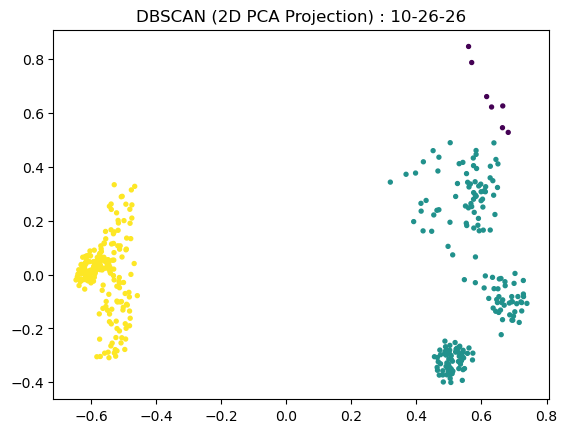

Label -1: 7 data points
Averages for Label -1 (Normalized Value):
 temperature    0.599389
humidity       0.511932
nitrogen       0.054082
potassium      0.086411
phosphorous    0.122167
moisture       0.609853
ph             0.001858
rainfall       0.000032
name           0.000000
dtype: float64 

Averages for Label -1 (Original Value):
temperature 29.714285714285708
humidity 58.142857142857146
nitrogen 7.571428571428572
potassium 17.714285714285715
phosphorous 17.71428571428571
moisture 39.285714285714285
ph 0.39545088948578805
rainfall 0.2205697842190848
name 0.0
Label 0: 190 data points
Averages for Label 0 (Normalized Value):
 temperature    0.411204
humidity       0.197950
nitrogen       0.124398
potassium      0.220128
phosphorous    0.410454
moisture       0.020542
ph             0.616431
rainfall       0.313084
name           0.000000
dtype: float64 

Averages for Label 0 (Original Value):
temperature 23.156056043263156
humidity 31.22706185568421
nitrogen 17.41578947368421
pot

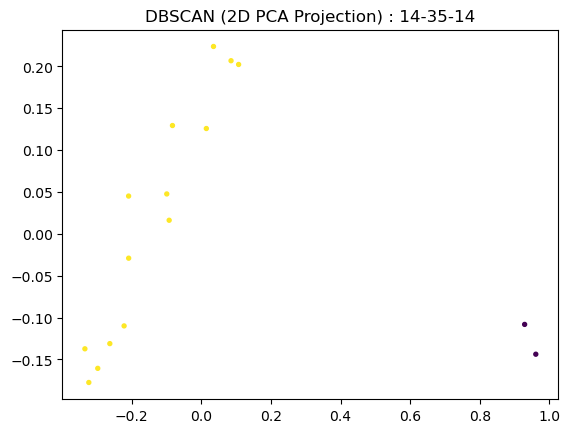

Label -1: 2 data points
Averages for Label -1 (Normalized Value):
 temperature    0.390507
humidity       0.591792
nitrogen       0.007143
potassium      0.078049
phosphorous    0.527586
moisture       0.017719
ph             0.731940
rainfall       0.137999
name           1.000000
dtype: float64 

Averages for Label -1 (Original Value):
temperature 22.434768679999998
humidity 64.9887174
nitrogen 1.0
potassium 16.0
phosphorous 76.50000000000001
moisture 0.2586425872116288
ph 7.373136008
rainfall 41.383091500000006
name 11.0
Label 0: 14 data points
Averages for Label 0 (Normalized Value):
 temperature    0.646530
humidity       0.546929
nitrogen       0.058673
potassium      0.041812
phosphorous    0.203941
moisture       0.699803
ph             0.005688
rainfall       0.000184
name           1.000000
dtype: float64 

Averages for Label 0 (Original Value):
temperature 31.357142857142854
humidity 61.14285714285714
nitrogen 8.214285714285714
potassium 8.571428571428571
phosphorous 29.5714

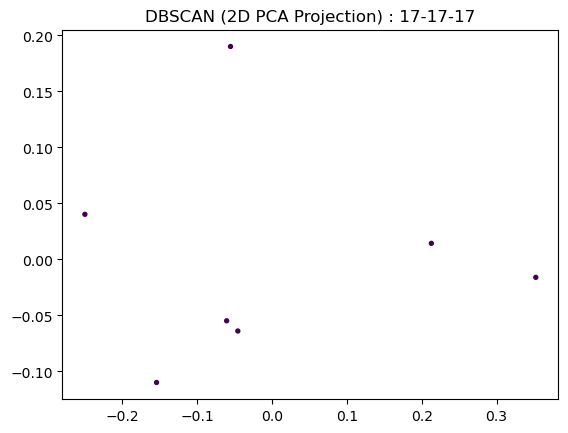

Label -1: 7 data points
Averages for Label -1 (Normalized Value):
 temperature    0.578893
humidity       0.505267
nitrogen       0.086735
potassium      0.063415
phosphorous    0.090640
moisture       0.729064
ph             0.004611
rainfall       0.000108
name           2.000000
dtype: float64 

Averages for Label -1 (Original Value):
temperature 28.999999999999996
humidity 57.57142857142858
nitrogen 12.142857142857144
potassium 13.0
phosphorous 13.142857142857142
moisture 47.14285714285714
ph 0.42175953422949397
rainfall 0.24348347108479695
name 22.0
Only one cluster. Silhouette score cannot be computed.


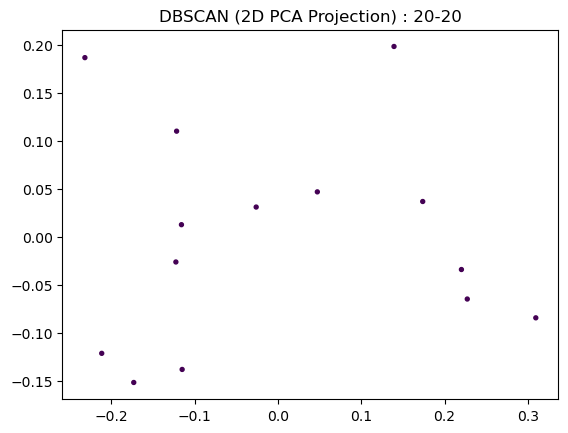

Label 0: 14 data points
Averages for Label 0 (Normalized Value):
 temperature    0.582992
humidity       0.505267
nitrogen       0.080102
potassium      0.000000
phosphorous    0.079803
moisture       0.700887
ph             0.010391
rainfall       0.000284
name           3.000000
dtype: float64 

Averages for Label 0 (Original Value):
temperature 29.14285714285714
humidity 57.571428571428584
nitrogen 11.214285714285714
potassium 0.0
phosphorous 11.57142857142857
moisture 45.28571428571427
ph 0.47700429358188645
rainfall 0.29590979054439276
name 33.0
Only one cluster. Silhouette score cannot be computed.


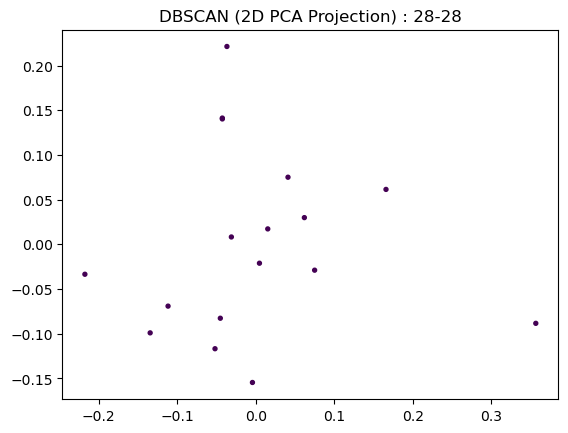

Label 0: 17 data points
Averages for Label 0 (Normalized Value):
 temperature    0.594085
humidity       0.511638
nitrogen       0.161765
potassium      0.000000
phosphorous    0.145233
moisture       0.650143
ph             0.011315
rainfall       0.000319
name           4.000000
dtype: float64 

Averages for Label 0 (Original Value):
temperature 29.529411764705877
humidity 58.11764705882353
nitrogen 22.64705882352941
potassium 0.0
phosphorous 21.058823529411764
moisture 41.94117647058824
ph 0.485834529610206
rainfall 0.30636131234240366
name 44.0
Only one cluster. Silhouette score cannot be computed.


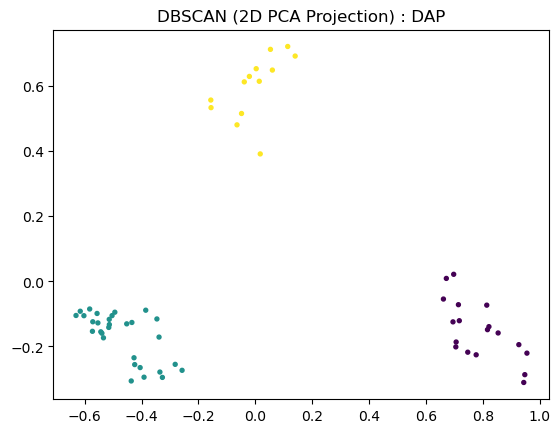

Label 0: 18 data points
Averages for Label 0 (Normalized Value):
 temperature    0.660195
humidity       0.549151
nitrogen       0.092460
potassium      0.000000
phosphorous    0.265134
moisture       0.660307
ph             0.009873
rainfall       0.000320
name           5.000000
dtype: float64 

Averages for Label 0 (Original Value):
temperature 31.833333333333336
humidity 61.33333333333333
nitrogen 12.944444444444445
potassium 0.0
phosphorous 38.44444444444444
moisture 42.611111111111114
ph 0.47205513861529724
rainfall 0.3065238179513649
name 55.0
Label 1: 30 data points
Averages for Label 1 (Normalized Value):
 temperature    0.469031
humidity       0.842375
nitrogen       0.029476
potassium      0.015252
phosphorous    0.015103
moisture       0.013131
ph             0.623772
rainfall       0.771216
name           5.000000
dtype: float64 

Averages for Label 1 (Original Value):
temperature 25.171333333333333
humidity 86.46966666666665
nitrogen 4.126666666666667
potassium 3.12666666

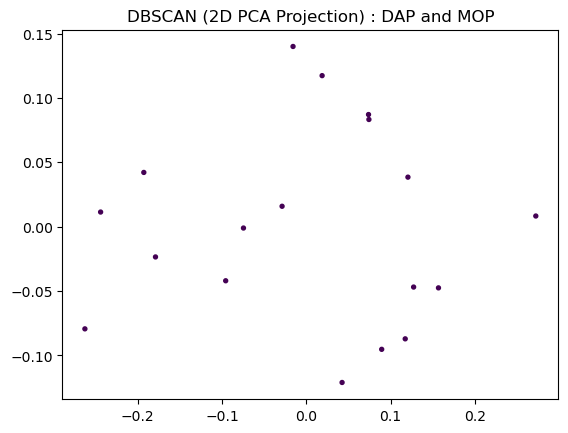

Label 0: 18 data points
Averages for Label 0 (Normalized Value):
 temperature    0.474286
humidity       0.857382
nitrogen       0.027778
potassium      0.012087
phosphorous    0.014521
moisture       0.015152
ph             0.619250
rainfall       0.723288
name           6.000000
dtype: float64 

Averages for Label 0 (Original Value):
temperature 25.354444444444443
humidity 87.75611111111111
nitrogen 3.888888888888889
potassium 2.477777777777778
phosphorous 2.1055555555555556
moisture 0.08949307209274082
ph 6.296111111111111
rainfall 216.0033333333333
name 66.0
Only one cluster. Silhouette score cannot be computed.


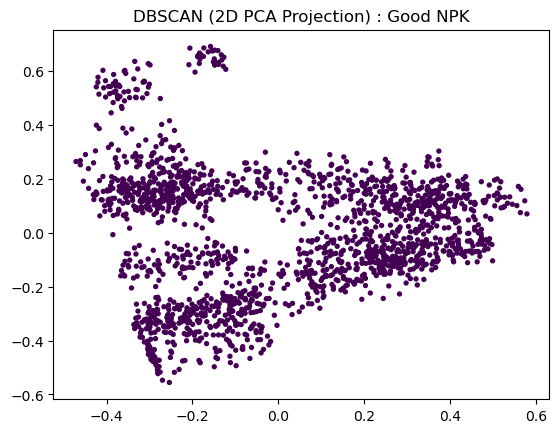

Label 0: 1828 data points
Averages for Label 0 (Normalized Value):
 temperature    0.497564
humidity       0.704449
nitrogen       0.404083
potassium      0.152758
phosphorous    0.296076
moisture       0.017338
ph             0.644811
rainfall       0.358124
name           7.000000
dtype: float64 

Averages for Label 0 (Original Value):
temperature 26.165679742002187
humidity 74.64614188603392
nitrogen 56.571663019693645
potassium 31.315371991247268
phosphorous 42.93107221006565
moisture 0.23357009947409757
ph 6.5404104073112705
rainfall 107.0571262394584
name 77.0
Only one cluster. Silhouette score cannot be computed.


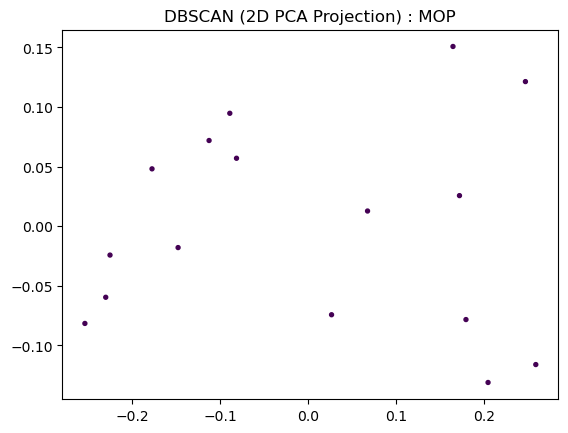

Label 0: 16 data points
Averages for Label 0 (Normalized Value):
 temperature    0.473979
humidity       0.867591
nitrogen       0.028571
potassium      0.010061
phosphorous    0.027586
moisture       0.009743
ph             0.617826
rainfall       0.696358
name           8.000000
dtype: float64 

Averages for Label 0 (Original Value):
temperature 25.34375
humidity 88.63125
nitrogen 4.0
potassium 2.0624999999999996
phosphorous 4.0
moisture -0.2670458937874317
ph 6.282500000000001
rainfall 207.96875000000003
name 88.0
Only one cluster. Silhouette score cannot be computed.


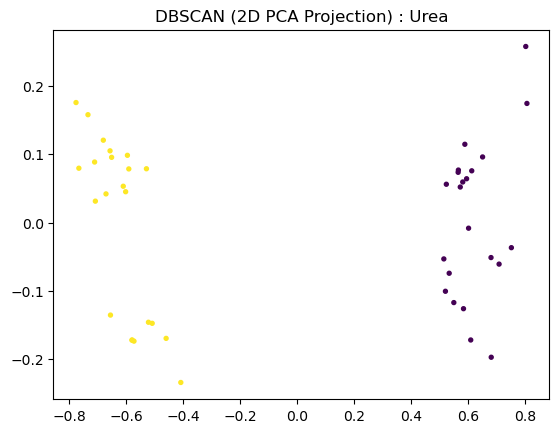

Label 0: 22 data points
Averages for Label 0 (Normalized Value):
 temperature    0.614109
humidity       0.518750
nitrogen       0.274026
potassium      0.000000
phosphorous    0.000000
moisture       0.650345
ph             0.012425
rainfall       0.000306
name           9.000000
dtype: float64 

Averages for Label 0 (Original Value):
temperature 30.227272727272723
humidity 58.727272727272705
nitrogen 38.36363636363636
potassium 0.0
phosphorous 0.0
moisture 41.95454545454545
ph 0.49644644621022077
rainfall 0.30241295958159026
name 99.0
Label 1: 22 data points
Averages for Label 1 (Normalized Value):
 temperature    0.451529
humidity       0.851489
nitrogen       0.017143
potassium      0.017029
phosphorous    0.025705
moisture       0.017701
ph             0.623462
rainfall       0.739202
name           9.000000
dtype: float64 

Averages for Label 1 (Original Value):
temperature 24.56136363636363
humidity 87.25090909090909
nitrogen 2.400000000000001
potassium 3.4909090909090916
phosph

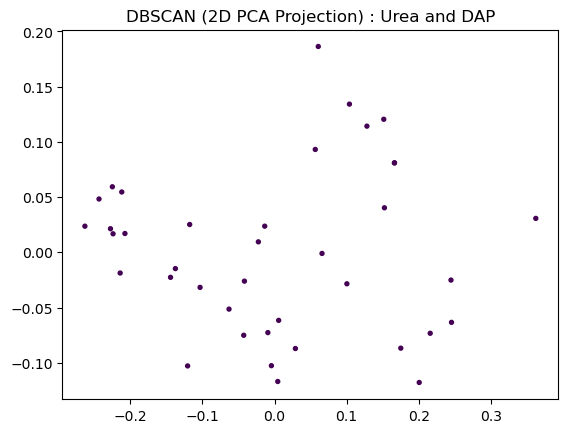

Label 0: 39 data points
Averages for Label 0 (Normalized Value):
 temperature     0.480250
humidity        0.862695
nitrogen        0.016209
potassium       0.015760
phosphorous     0.014111
moisture        0.025162
ph              0.604660
rainfall        0.681595
name           10.000000
dtype: float64 

Averages for Label 0 (Original Value):
temperature 25.562307692307687
humidity 88.21153846153845
nitrogen 2.269230769230769
potassium 3.2307692307692313
phosphorous 2.046153846153847
moisture 0.7492032820484255
ph 6.156666666666665
rainfall 203.56435897435892
name 110.0
Only one cluster. Silhouette score cannot be computed.


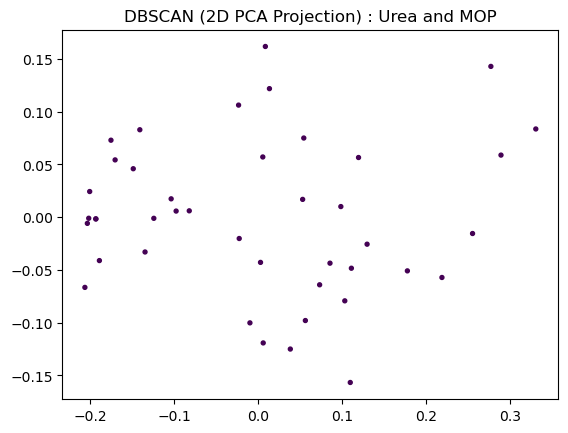

Label 0: 42 data points
Averages for Label 0 (Normalized Value):
 temperature     0.475033
humidity        0.868568
nitrogen        0.015646
potassium       0.010046
phosphorous     0.027373
moisture        0.020682
ph              0.604535
rainfall        0.662269
name           11.000000
dtype: float64 

Averages for Label 0 (Original Value):
temperature 25.380476190476188
humidity 88.71499999999999
nitrogen 2.1904761904761907
potassium 2.0595238095238098
phosphorous 3.9690476190476196
moisture 0.4539195565153432
ph 6.1554761904761905
rainfall 197.7985714285714
name 121.0
Only one cluster. Silhouette score cannot be computed.


In [1320]:
for key, value in fertilizer_dataset.items():
    dbscan_analysis(data=value, key=key)    

### MODELING : PERFORMANCE TEST

- Using Silhouette Score 
<ul>
    <li>1 means good separation between clusters</li>
    <li>0 means possibility of overlapping cluster</li>
    <li>-1 means poor cluster separation</li>
</ul>

In [1321]:
print("Silhouette Score Average : ", np.mean(silhouette_avgs))

Silhouette Score Average :  0.7273181409297291


### CONCLUSION
1. Hasil prediksi pada feature pada tahap preprocessing menghasilkan data-data yang dapat dibagi sesuai tiap pupuk, dan hasil model pelatihannya bersifat dominan pada beberapa jenis pupuk saja.
2. Jarang ditemukan noise yang ditemukan pada hasil clustering pada masing-masing tipe pupuk, namun pada dataset yang jumlahnya cukup besar terkadang muncul dua cluster non-outlier. Apabila dianalisis rata-rata value feature pada cluster tersebut, maka terdapat perbedaan komposisi yang cukup drastis. Hal ini dapat dijadikan referensi sebagai penanda adanya anomali pada satu cluster atau cluster yang lainnya, karena seharusnya masing-masing tipe pupuk memiliki konsistensi untuk komposisi dan karakteristiknya.